Se carga el dataset que se utilizara

In [1]:
import psycopg2
import numpy as np
import pandas as pd

#datos que llegan del front
sourceid = 1
endid = 40
potatoid = 1
records = []

try:
    connection = psycopg2.connect(user = "postgres", password = "r351d3nc14501", host = "127.0.0.1", port = "5432", database = "potatoe_markets")
    cursor = connection.cursor()
    
    postgreSQL_select_Query = "select P.price FROM normalized_price P INNER JOIN Market M ON P.SourceMarketID = M.MarketID INNER JOIN Market MM ON P.endmarketid = mm.marketid INNER JOIN Potato PP on p.potatoid = pp.potatoid WHERE m.marketid = {} AND MM.marketid = {} AND pp.potatoid = {} ORDER BY SNIIMDATE".format(sourceid, endid, potatoid)
    cursor.execute(postgreSQL_select_Query)
    print("Selecting rows from mobile table using cursor.fetchall")
    value_records = cursor.fetchall()
    print("Save each column value into the correspondent  array")
    for row in value_records:
        records.append(row[0])
        
    postgreSQL_select_Query = "select (select marketName from market where marketid = {}), (select marketName from market where marketid = {})".format(sourceid, endid)
    cursor.execute(postgreSQL_select_Query)
    #print("Selecting rows from mobile table using cursor.fetchall")
    value_records = cursor.fetchall()
    #Save each column value into the correspondent  array
    print(value_records)
    sourceMarketName = value_records[0][0]
    endMarketName = value_records[0][1]
    
except (Exception, psycopg2.Error) as error :
    print ("Error while fetching data from PostgreSQL", error)
finally:
    #closing database connection.
    if(connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")
    
values = np.array(records, dtype='float64')

dataset = pd.DataFrame(values)
print(dataset.head)

Selecting rows from mobile table using cursor.fetchall
Save each column value into the correspondent  array
[('Sinaloa', 'Zacatecas: Mercado de Abasto de Zacatecas')]
PostgreSQL connection is closed
<bound method NDFrame.head of               0
0      8.000000
1      8.000000
2      8.000000
3      8.000000
4      9.000000
5      9.000000
6      9.000000
7      9.000000
8      9.000000
9      9.000000
10     9.000000
11     9.000000
12     9.000000
13     9.000000
14     9.000000
15     9.000000
16     9.000000
17     9.000000
18     9.000000
19     9.000000
20     9.000000
21     8.500000
22     8.000000
23     8.000000
24     8.500000
25     8.500000
26     8.500000
27     8.500000
28     8.500000
29     8.333333
...         ...
2277  15.000000
2278  15.000000
2279  15.000000
2280  15.000000
2281  14.000000
2282  16.000000
2283  16.000000
2284  15.000000
2285  15.000000
2286  15.000000
2287  15.000000
2288  15.000000
2289  15.000000
2290  15.000000
2291  13.000000
2292  13.000000
229

from pandas import DataFrame
import pandas as pd

dataset =  DataFrame(pd.read_csv('potatoeseries03.csv', header=None))
print(dataset.head)

Se aplica media movil en los datos.

In [2]:
from matplotlib import pyplot

dataset_soft = dataset.rolling(window=8, min_periods=1).mean()

pyplot.figure(num=None, figsize=(18, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.style.use("ggplot")
pyplot.plot(dataset[1:150], label='Input')
pyplot.plot(dataset_soft[1:150], label='Soft')
pyplot.title('Media móvil Aplicada')
pyplot.legend()
pyplot.show()
print(dataset_soft)

<Figure size 5760x1920 with 1 Axes>

              0
0      8.000000
1      8.000000
2      8.000000
3      8.000000
4      8.200000
5      8.333333
6      8.428571
7      8.500000
8      8.625000
9      8.750000
10     8.875000
11     9.000000
12     9.000000
13     9.000000
14     9.000000
15     9.000000
16     9.000000
17     9.000000
18     9.000000
19     9.000000
20     9.000000
21     8.937500
22     8.812500
23     8.687500
24     8.625000
25     8.562500
26     8.500000
27     8.437500
28     8.375000
29     8.354167
...         ...
2277  15.875000
2278  15.750000
2279  15.625000
2280  15.500000
2281  15.250000
2282  15.250000
2283  15.250000
2284  15.125000
2285  15.125000
2286  15.125000
2287  15.125000
2288  15.125000
2289  15.250000
2290  15.125000
2291  14.750000
2292  14.500000
2293  14.250000
2294  14.000000
2295  13.875000
2296  13.750000
2297  13.500000
2298  13.250000
2299  13.375000
2300  13.500000
2301  13.625000
2302  13.750000
2303  13.750000
2304  13.750000
2305  13.875000
2306  14.000000

[2307 r

Se define el tamaño de ventana que tendra la serie de tiempos, y se transforma a una colección de datos para el entrenamiento supervisado de la red.

In [3]:
import Tools as tls

size = 25

dataset_serialized = tls.series_to_supervised(dataset_soft,size, n_out=1, dropnan = True)
print(dataset_serialized)

      var1(t-25)  var1(t-24)  var1(t-23)  var1(t-22)  var1(t-21)  var1(t-20)  \
25      8.000000    8.000000    8.000000    8.000000    8.200000    8.333333   
26      8.000000    8.000000    8.000000    8.200000    8.333333    8.428571   
27      8.000000    8.000000    8.200000    8.333333    8.428571    8.500000   
28      8.000000    8.200000    8.333333    8.428571    8.500000    8.625000   
29      8.200000    8.333333    8.428571    8.500000    8.625000    8.750000   
30      8.333333    8.428571    8.500000    8.625000    8.750000    8.875000   
31      8.428571    8.500000    8.625000    8.750000    8.875000    9.000000   
32      8.500000    8.625000    8.750000    8.875000    9.000000    9.000000   
33      8.625000    8.750000    8.875000    9.000000    9.000000    9.000000   
34      8.750000    8.875000    9.000000    9.000000    9.000000    9.000000   
35      8.875000    9.000000    9.000000    9.000000    9.000000    9.000000   
36      9.000000    9.000000    9.000000

Se normalizan los datos entre 0 y 1

In [4]:
from sklearn import preprocessing

datasetnorm = preprocessing.minmax_scale(dataset_serialized, feature_range=(0, 1))
datasetnorm = pd.DataFrame(datasetnorm)
#print(datasetnorm)

Preparamos los datos para alimentar la red para entrenamiento y prueba.

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

zy = datasetnorm.iloc[:, -1:]
zx = datasetnorm.iloc[:, :-1].values

X = np.array(zx, dtype='float64')
y = np.array(zy, dtype='float64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20)

Contruimos nuestro modelo y compilamos

In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, activation = 'relu', input_shape=(X_train.shape[1],))) # importante declarar correctamente shape
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam', metrics=['mse'])

Using TensorFlow backend.
W1108 12:57:44.811339  8492 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1108 12:57:44.823338  8492 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1108 12:57:44.825325  8492 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1108 12:57:44.851262  8492 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is depr

Entrenamos nuestro modelo y guardamos datos en "history"

In [7]:
history = model.fit(X_train, y_train, epochs=70, batch_size=24, validation_data=(X_test, y_test), verbose=1, shuffle=False)
modelName = "{} {}.h5".format(sourceMarketName, endMarketName).replace(':', '').replace('"', '')
model.save(modelName)

W1108 12:57:44.932122  8492 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1108 12:57:44.991843  8492 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1597 samples, validate on 685 samples
Epoch 1/70
1597/1597 [==============================] - 0s 142us/step - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 2/70
1597/1597 [==============================] - 0s 32us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 3/70
1597/1597 [==============================] - 0s 32us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 4/70
1597/1597 [==============================] - 0s 32us/step - loss: 8.2503e-04 - mean_squared_error: 8.2503e-04 - val_loss: 8.0333e-04 - val_mean_squared_error: 8.0333e-04
Epoch 5/70
1597/1597 [==============================] - 0s 32us/step - loss: 6.9162e-04 - mean_squared_error: 6.9162e-04 - val_loss: 6.6895e-04 - val_mean_squared_error: 6.6895e-04
Epoch 6/70
1597/1597 [==============================] - 0s 36us/step - loss: 5.8980e-04 - mean_

1597/1597 [==============================] - 0s 31us/step - loss: 1.2616e-04 - mean_squared_error: 1.2616e-04 - val_loss: 1.0302e-04 - val_mean_squared_error: 1.0302e-04
Epoch 47/70
1597/1597 [==============================] - 0s 31us/step - loss: 1.2553e-04 - mean_squared_error: 1.2553e-04 - val_loss: 1.0192e-04 - val_mean_squared_error: 1.0192e-04
Epoch 48/70
1597/1597 [==============================] - 0s 30us/step - loss: 1.2483e-04 - mean_squared_error: 1.2483e-04 - val_loss: 1.0104e-04 - val_mean_squared_error: 1.0104e-04
Epoch 49/70
1597/1597 [==============================] - 0s 34us/step - loss: 1.2439e-04 - mean_squared_error: 1.2439e-04 - val_loss: 1.0027e-04 - val_mean_squared_error: 1.0027e-04
Epoch 50/70
1597/1597 [==============================] - 0s 30us/step - loss: 1.2382e-04 - mean_squared_error: 1.2382e-04 - val_loss: 9.9491e-05 - val_mean_squared_error: 9.9491e-05
Epoch 51/70
1597/1597 [==============================] - 0s 29us/step - loss: 1.2329e-04 - mean_square

Graficamos...

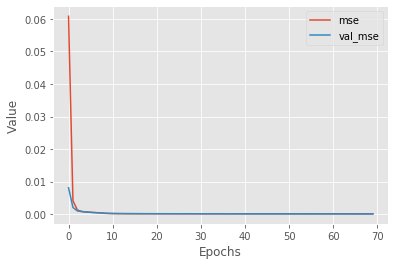

In [8]:
pyplot.style.use("ggplot")
pyplot.plot(history.history['mean_squared_error'], label='mse')
pyplot.plot(history.history['val_mean_squared_error'], label='val_mse')
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

Se realiza una predicción con los datos de prueba, y estos son comparados.

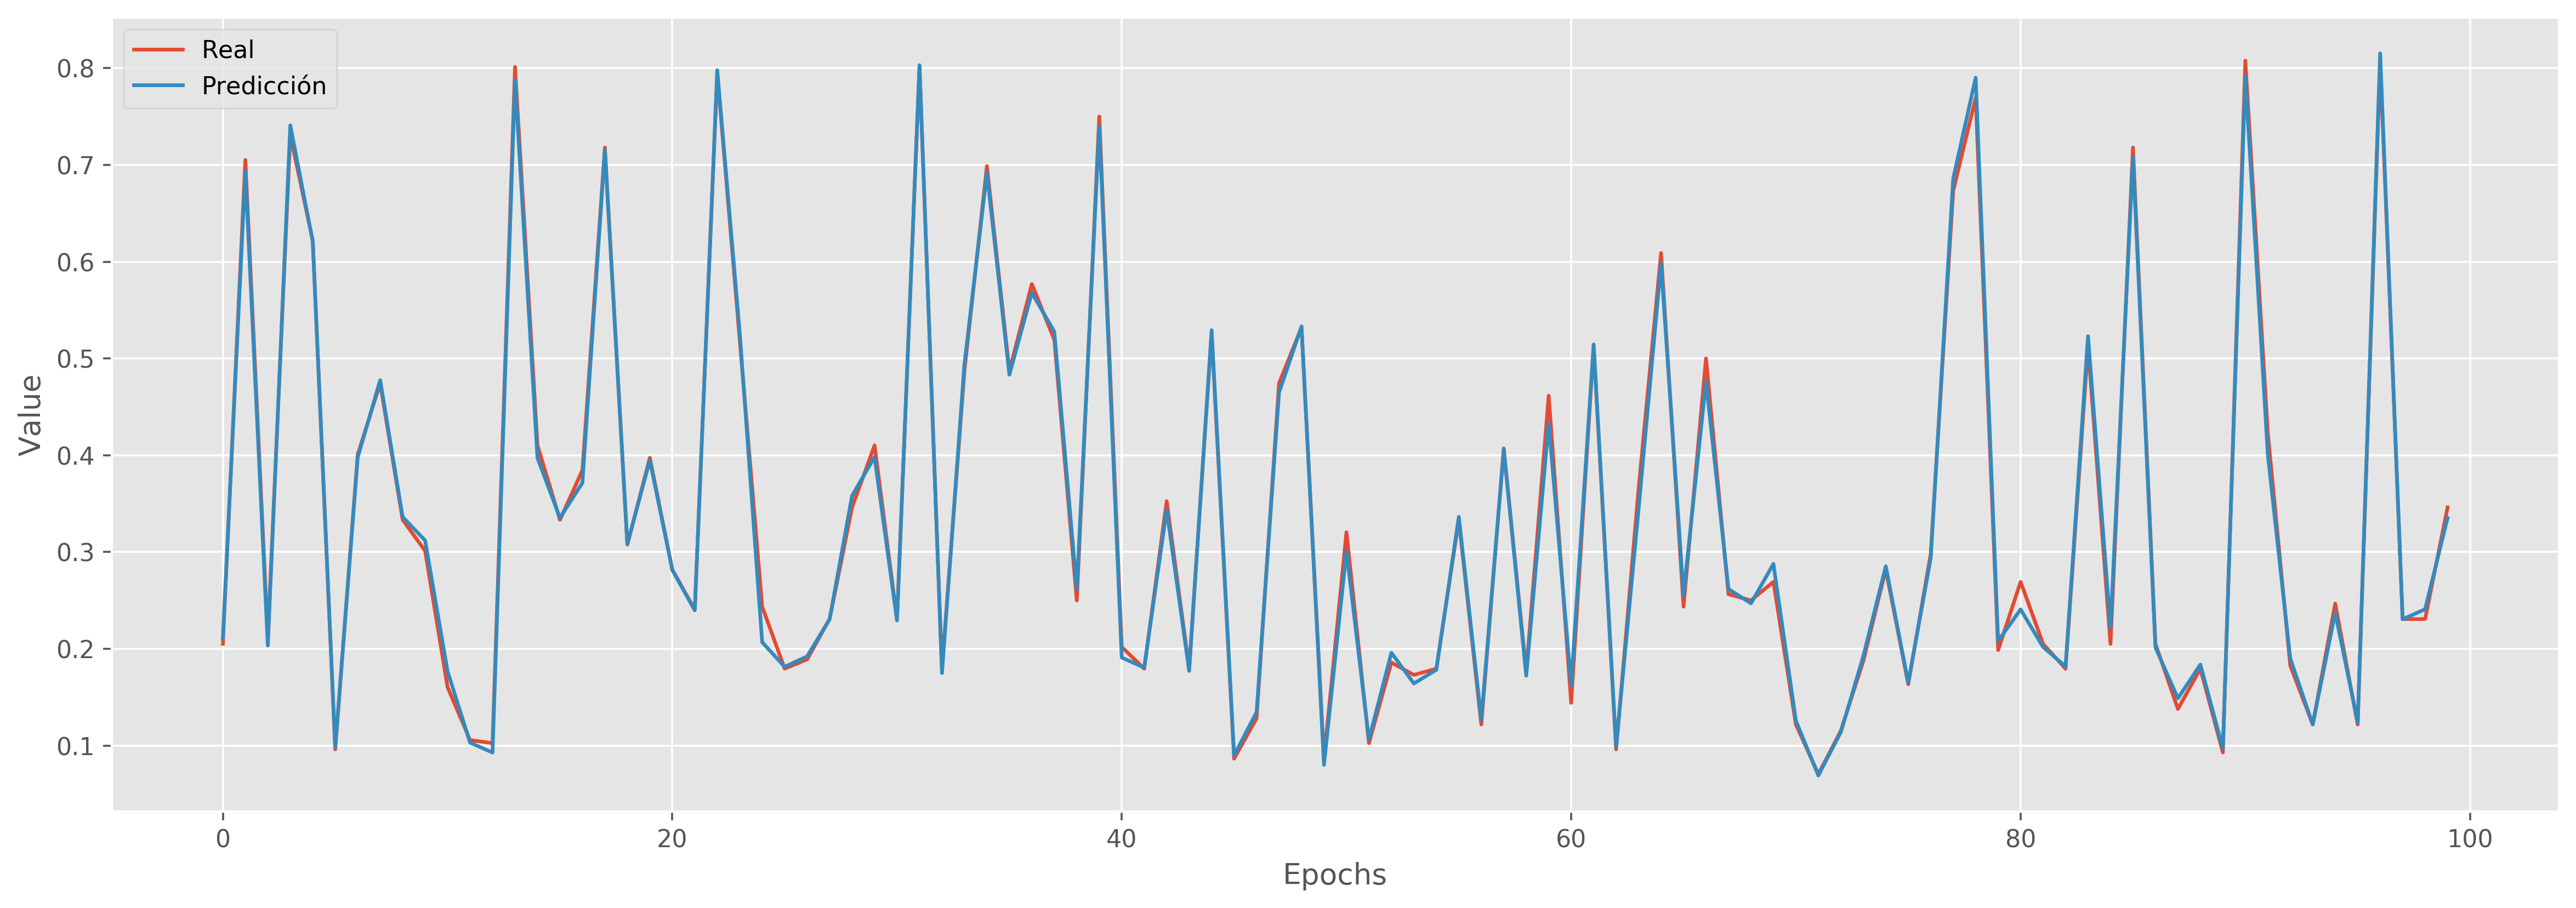

In [9]:
predictions = model.predict(X_test, 10, verbose=0)

pyplot.figure(num=None, figsize=(18, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.plot(y_test[0:100,], label='Real')
pyplot.plot(predictions[0:100,], label='Predicción')
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()